# Diabetes Prediction system using Machine Learning algorithm

#### Author : Subramanya K S

#### import python libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### import the dataset

In [2]:
#importing the dataset
diabetes = pd.read_csv('E:\ML intern\project\dataset\diabetes.csv')
#list the first five  rows
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


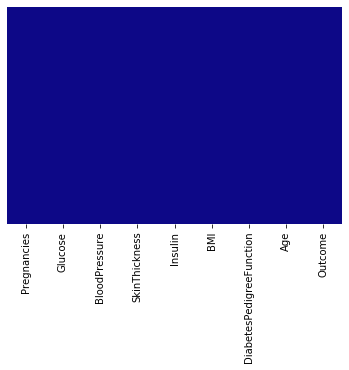

In [4]:
sns.heatmap(diabetes.isnull(),yticklabels=False,cbar=False,cmap='plasma')

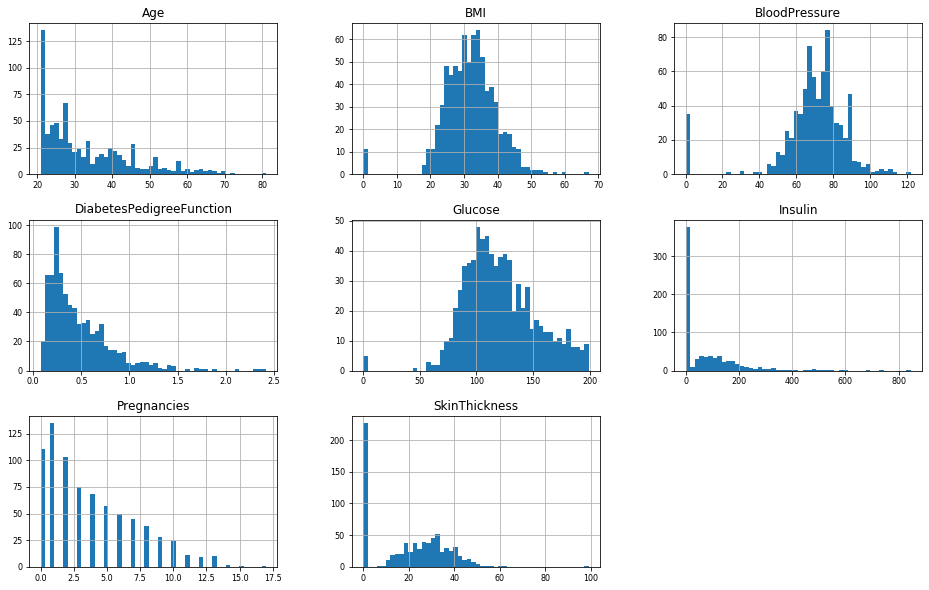

In [5]:
diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

### outlier cleaning 

#### Z-Score

In [7]:
from scipy import stats
z=np.abs(stats.zscore(diabetes))
print(z)

[[0.63994726 0.84832379 0.14964075 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.12339636 0.16054575 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 1.94372388 0.26394125 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.00330087 0.14964075 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.1597866  0.47073225 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.8730192  0.04624525 ... 0.47378505 0.87137393 0.73212021]]


In [8]:
threshold = 3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [9]:
diabetes = diabetes[(z<3).all(axis=1)]

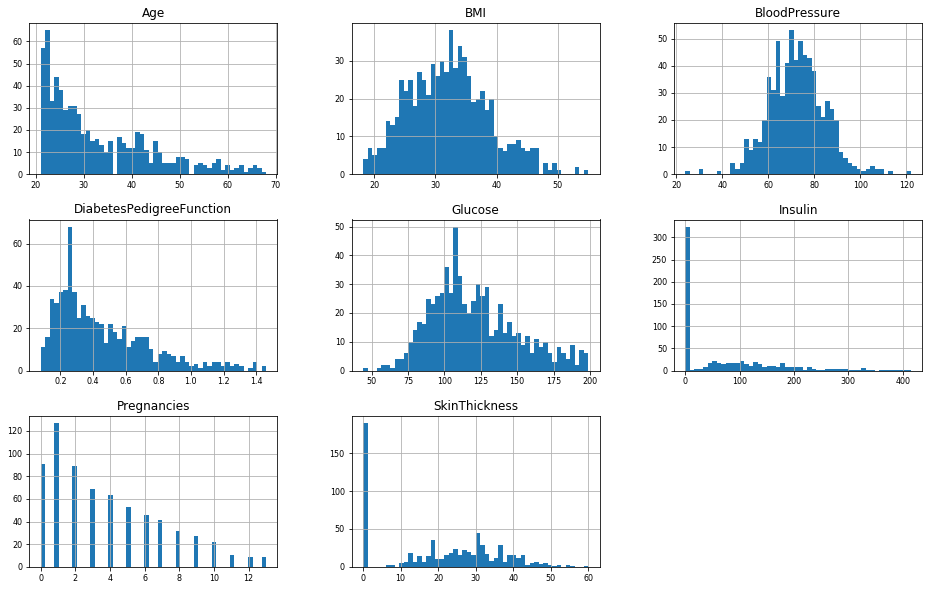

In [10]:
diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

#### IQR Score

In [52]:
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      40.0000
BloodPressure                16.0000
SkinThickness                32.0000
Insulin                     126.0000
BMI                           8.9000
DiabetesPedigreeFunction      0.3605
Age                          16.0000
Outcome                       1.0000
dtype: float64


In [54]:
diabetes = diabetes[~((diabetes<(Q1-1.5*IQR))|(diabetes>(Q3+1.5*IQR))).any(axis=1)]
diabetes.shape

(619, 9)

([<matplotlib.axis.XTick at 0x1aa9f5a7cc8>,
 <a list of 2 Text xticklabel objects>)

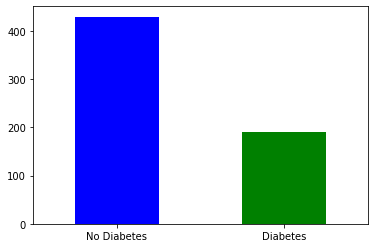

In [55]:
diabetes["Outcome"].value_counts().plot(kind="bar",color=["blue","green"])
plt.xticks(np.arange(2),('No Diabetes', 'Diabetes'),rotation=0)

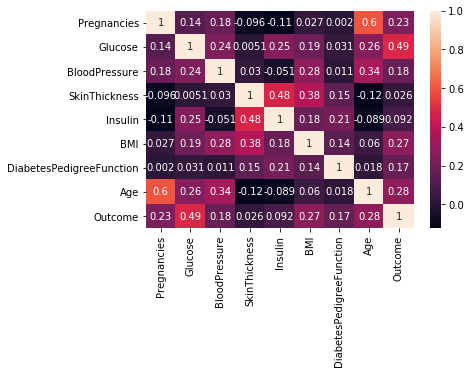

In [56]:
sns.heatmap(diabetes.corr(),annot= True)

#### Dependent and independent variable

In [57]:
X=diabetes.iloc[:,[1,2,3,4,5,6,7]].values
y= diabetes.iloc[:,8].values

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#### Feature Scalling

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Since this is a categorical dataset to determine whether customer will by the product or not. We use classification algorithm

1. Logistic Regression
2. Naive Bayes
3. K Nearest Neighbour
4. Decision tree
5. Random Forest
6. Suport vector machine
7. Kernel Suport vector machine

### 1. Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred=model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  7],
       [26, 21]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test,y_pred)

0.7338709677419355

In [65]:
print(f"Training accuracy {round(model.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(model.score(X_test,y_test)*100,2)}%")

Training accuracy 82.02%
Testing accuracy 73.39%


### 2. Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB  
bclassifier = GaussianNB()  
bclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
y_pred = bclassifier.predict(X_test) 

In [68]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[63, 14],
       [21, 26]], dtype=int64)

#### Evaluation

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.717741935483871

In [70]:
print(f"Training accuracy {round(bclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(bclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 79.39%
Testing accuracy 71.77%


### 3. KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
cmatrix =confusion_matrix(y_test,y_pred)
cmatrix

array([[67, 10],
       [23, 24]], dtype=int64)

#### Evaluation

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7338709677419355

In [75]:
print(f"Training accuracy {round(classifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(classifier.score(X_test,y_test)*100,2)}%")

Training accuracy 84.44%
Testing accuracy 73.39%


### 4. Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dclassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [77]:
y_pred = dclassifier.predict(X_test)

In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusm = confusion_matrix(y_test, y_pred)
confusm

array([[60, 17],
       [21, 26]], dtype=int64)

#### Evaluation

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6935483870967742

In [80]:
print(f"Training accuracy {round(dclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(dclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 100.0%
Testing accuracy 69.35%


### 5. Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier  
rclassifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
#Predicting the test set result  
y_pred= rclassifier.predict(X_test)  

In [83]:
from sklearn.metrics import confusion_matrix  
conm= confusion_matrix(y_test, y_pred) 
conm

array([[67, 10],
       [26, 21]], dtype=int64)

#### Evaluation

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7096774193548387

In [85]:
print(f"Training accuracy {round(rclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(rclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 97.98%
Testing accuracy 70.97%


### 6. Support Vector Machine

In [86]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',random_state=0)
svclassifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [87]:
y_pred = svclassifier.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix
confusm = confusion_matrix(y_test,y_pred)
confusm

array([[70,  7],
       [26, 21]], dtype=int64)

#### Evaluation

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7338709677419355

In [90]:
print(f"Training accuracy {round(svclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(svclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 82.22%
Testing accuracy 73.39%


### 7. Kernel Support Vector Machine

In [91]:
from sklearn.svm import SVC
ksclassifier = SVC(kernel = 'rbf' ,random_state = 0)
ksclassifier.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [92]:
#Predicting the Test set results
y_pred = ksclassifier.predict(X_test)

In [93]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix  
#Here confusion_matrix is a function and not a class as class has capitalletters at the beginning.
cm = confusion_matrix(y_test , y_pred)
cm

array([[69,  8],
       [28, 19]], dtype=int64)

#### Evaluation

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7096774193548387

In [95]:
print(f"Training accuracy {round(ksclassifier.score(X_train,y_train)*100,2)}%")
print(f"Testing accuracy {round(ksclassifier.score(X_test,y_test)*100,2)}%")

Training accuracy 86.67%
Testing accuracy 70.97%


#####  --------------------------------------END-------------------------------------------------------------